Importing the dependencies

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

Data collection and analysis

In [5]:
# loading the csv data to a pandas dataframe
dataset = pd.read_csv(r"C:\Users\sydul\Downloads\insurance.csv")

In [6]:
 # loading first 5 rows in the dataframe
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#  print last 5 rows of the dataframe
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
# number of rows and columns
dataset.shape

(1338, 7)

In [14]:
# getting some basic informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

sex

smoker

region

In [17]:
# checking the number of missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# statistical measures of the dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

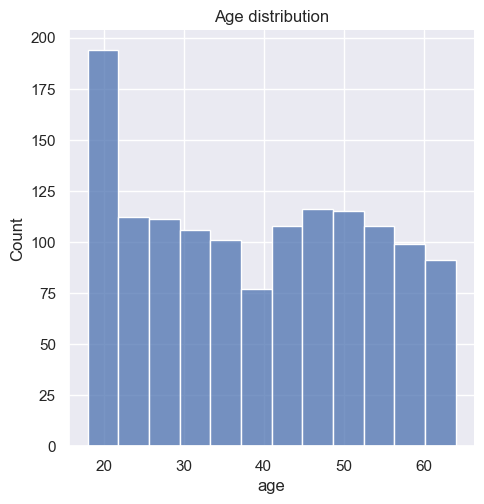

In [21]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['age'])
plt.title('Age distribution')
plt.show()

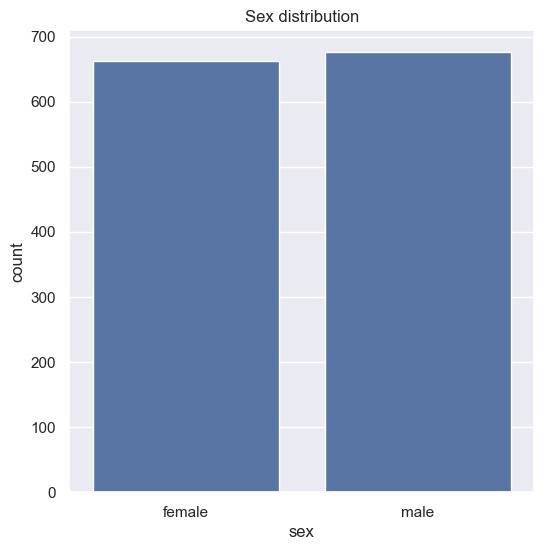

In [22]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=dataset)
plt.title('Sex distribution')
plt.show()

In [23]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

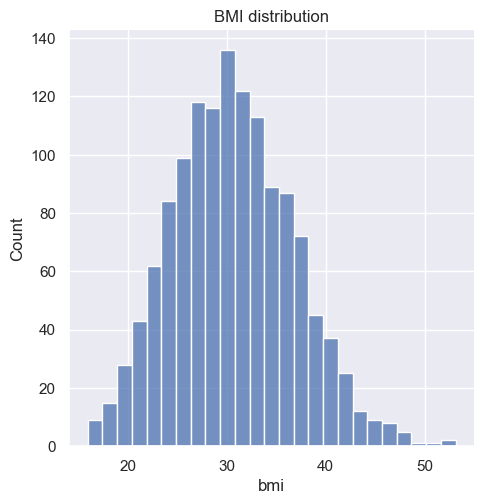

In [24]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI Range--> 18.5to 24.9

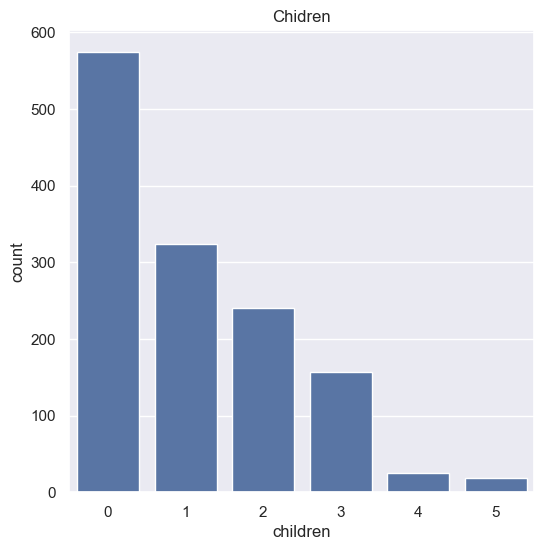

In [30]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=dataset)
plt.title('Chidren')
plt.show()

In [32]:
dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

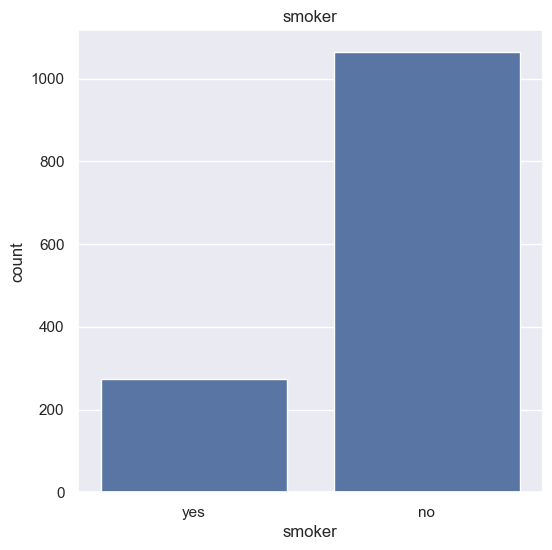

In [34]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=dataset)
plt.title('smoker')
plt.show()

In [35]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

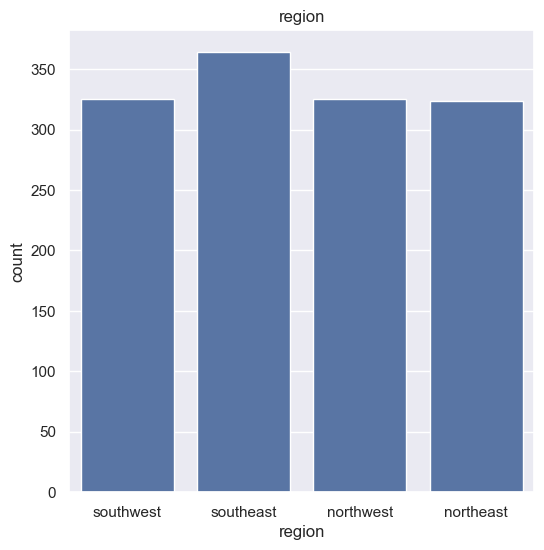

In [38]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=dataset)
plt.title('region')
plt.show()

In [40]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

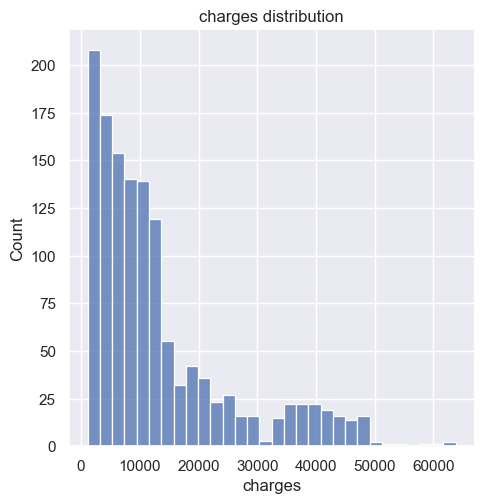

In [42]:
#  distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(dataset['charges'])
plt.title('charges distribution')
plt.show()

Data pre-processing 

Encoding the categorical features

In [46]:
# encoding sex column
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker column
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encoding region column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\sydul\AppData\Local\Temp\ipykernel_8592\2278565593.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\sydul\AppData\Local\Temp\ipykernel_8592\2278565593.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\sydul\AppData\Local\Temp\ipykernel_8592\2278565593.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

splitting the Feature and Target

In [49]:
x = dataset.drop(columns='charges',axis=1)
y = dataset['charges']

In [51]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [53]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and test data

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [58]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training

Linear Regression

In [63]:
# loading linear regression model
regressor = LinearRegression()

In [65]:
regressor.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [69]:
# prediction on training data
training_data_prediction=regressor.predict(x_train)

In [73]:
# R squared value
r2_train =metrics.r2_score(y_train,training_data_prediction)
print('R squred value :',r2_train)

R squred value : 0.751505643411174


In [75]:
# prediction on test data
test_data_prediction=regressor.predict(x_test)

In [79]:
# R squared value
r2_test =metrics.r2_score(y_test,test_data_prediction)
print('R squred value :',r2_test)

R squred value : 0.7447273869684077


Building a predictive system

In [86]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.0805764960523


C:\Users\sydul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
